In [73]:
import numpy as np
import tensorflow as tf
import random
import sys
import eli5

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

ww = 200
bs = 32

random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

input_columns = list(np.arange(0, 2308, 1))


linear_model, lstm_model, dnn_model, df_all_chan, das_data_all, f  = d2d.import_data(filename = file, input_columns = input_columns)

da = df_all_chan.to_numpy()

multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                input_width=ww,
                                                label_width=1, 
                                                shift=0,
                                                label_columns=['Discharge'],
                                                input_columns=input_columns,
                                                shuffle=True,
                                                batch_size=bs)

history['lstm_whole_cable'] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

val_performance['lstm_whole_cable'] = lstm_model.evaluate(multi_step_window_shuffled.val)
performance['lstm_whole_cable'] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Epoch 1/1000
7/7 [==============================] - 3s 230ms/step - loss: 0.8887 - mean_absolute_error: 0.7776 - val_loss: 0.7887 - val_mean_absolute_error: 0.6860
Epoch 2/1000
7/7 [==============================] - 1s 194ms/step - loss: 0.5029 - mean_absolute_error: 0.5529 - val_loss: 0.5611 - val_mean_absolute_error: 0.5170
Epoch 3/1000
7/7 [==============================] - 1s 172ms/step - loss: 0.3165 - mean_absolute_error: 0.4408 - val_loss: 0.4277 - val_mean_absolute_error: 0.4563
Epoch 4/1000
7/7 [==============================] - 1s 173ms/step - loss: 0.2538 - mean_absolute_error: 0.3796 - val_loss: 0.4809 - val_mean_absolute_error: 0.4639
Epoch 5/1000
7/7 [==============================] - 1s 167ms/step - loss: 0.1986 - mean_absolute_error: 0.3231 - val_loss: 0.3820 - val_mean_absolute_error: 0.4363
Epoch 6/1000
7/7 [==============================] - 1s 170ms/step - loss: 0.1726 - mean_absolute_error: 0.2924 - val_lo

In [74]:
prediction_set = d2d.WindowGenerator(df_all_chan,
                                    input_width=ww,
                                    label_width=1, 
                                    shift=0,
                                    label_columns=['Discharge'],
                                    input_columns=input_columns,
                                    shuffle=False,
                                    batch_size=bs)

2308


In [47]:
predictions = lstm_model.predict(prediction_set.train).squeeze()

In [48]:
predictions_real = (predictions * prediction_set.dis_std) + prediction_set.dis_mean

In [49]:
real_dis = []

for i in prediction_set.train.as_numpy_iterator():
    real_dis.append(i[-1])
    
real_dis = np.asarray(real_dis)
real_dis = real_dis.reshape(real_dis.shape[0] * real_dis.shape[1])

real_dis = (real_dis * prediction_set.dis_std) + prediction_set.dis_mean

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


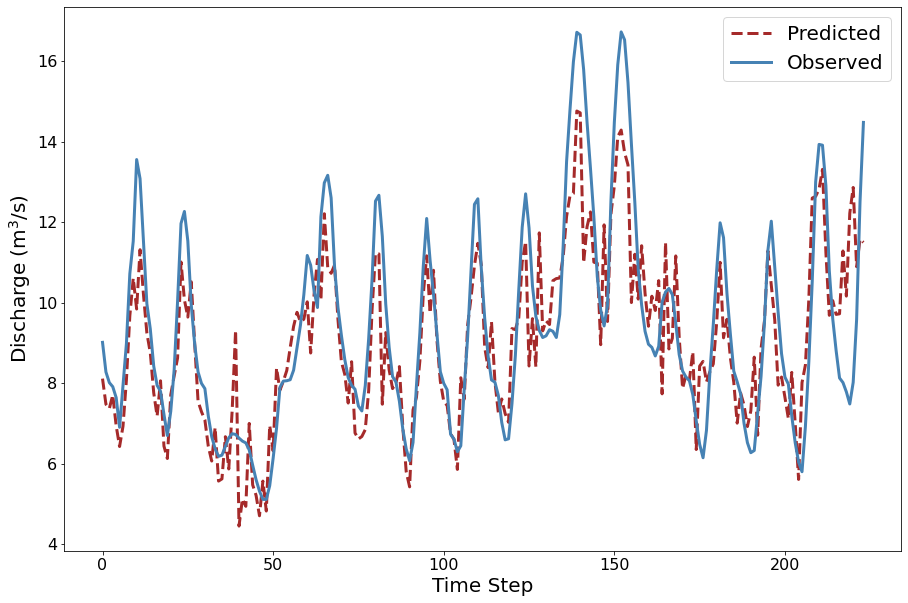

In [87]:
import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots(figsize = [15,10])
fig.patch.set_facecolor('white')

ax.plot(predictions_real, label = 'Predicted', lw = 3, color = 'brown', linestyle = '--')
ax.plot(real_dis, label = 'Observed', lw = 3, color = 'steelblue')

ax.set_ylabel('Discharge (m$^3$/s)', size=20)
ax.set_xlabel('Time Step', size=20)

ax.tick_params(labelsize=16)

ax.legend(prop={'size': 20})

fig.savefig('discharge_train_timeseries.eps', dpi=1200)

plt.show()

# Bootstrapped residuals

In [55]:
import numpy as np
import tensorflow as tf
import random
import sys
import eli5

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os

seeds = list(np.arange(0, 50, 1))
residuals = {}

for seed in seeds:
    
    SEED = seed
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

    file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

    filt = 'Highpass'

    history = {}
    val_performance = {}
    performance = {}

    ww = 200
    bs = 32

    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

    input_columns = list(np.arange(0, 2308, 1))


    linear_model, lstm_model, dnn_model, df_all_chan, das_data_all, f  = d2d.import_data(filename = file, input_columns = input_columns)

    da = df_all_chan.to_numpy()

    multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                    input_width=ww,
                                                    label_width=1, 
                                                    shift=0,
                                                    label_columns=['Discharge'],
                                                    input_columns=input_columns,
                                                    shuffle=True,
                                                    batch_size=bs)

    history['lstm_whole_cable'] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

    val_performance['lstm_whole_cable'] = lstm_model.evaluate(multi_step_window_shuffled.val)
    performance['lstm_whole_cable'] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)
    
    prediction_set = d2d.WindowGenerator(df_all_chan,
                                    input_width=ww,
                                    label_width=1, 
                                    shift=0,
                                    label_columns=['Discharge'],
                                    input_columns=input_columns,
                                    shuffle=False,
                                    batch_size=bs)
    
    predictions = lstm_model.predict(prediction_set.train).squeeze()
    
    predictions_real = (predictions * prediction_set.dis_std) + prediction_set.dis_mean
    
    real_dis = []

    for i in prediction_set.train.as_numpy_iterator():
        real_dis.append(i[-1])

    real_dis = np.asarray(real_dis)
    real_dis = real_dis.reshape(real_dis.shape[0] * real_dis.shape[1])

    real_dis = (real_dis * prediction_set.dis_std) + prediction_set.dis_mean
    
    residuals['seed_'+str(seed)] = predictions_real - real_dis
    
    print('Done with seed: ' + str(seed))



<ipython-input-55-509a33ba15ad>:19: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)
<ipython-input-55-509a33ba15ad>:34: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(SEED)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Epoch 1/1000
7/7 [==============================] - 3s 264ms/step - loss: 0.8842 - mean_absolute_error: 0.7757 - val_loss: 0.4469 - val_mean_absolute_error: 0.5254
Epoch 2/1000
7/7 [==============================] - 1s 200ms/step - loss: 0.5538 - mean_absolute_error: 0.5516 - val_loss: 0.5404 - val_mean_absolute_error: 0.6103
Epoch 3/1000
7/7 [==============================] - 1s 206ms/step - loss: 0.3882 - mean_absolute_error: 0.4912 - val_loss: 0.4451 - val_mean_absolute_error: 0.5200
Epoch 4/1000
7/7 [==============================] - 1s 224ms/step - loss: 0.3321 - mean_absolute_error: 0.4325 - val_loss: 0.3548 - val_mean_absolute_error: 0.4969
Epoch 5/1000
7/7 [==============================] - 1s 192ms/step - loss: 0.2493 - mean_absolute_error: 0.3749 - val_loss: 0.2874 - val_mean_absolute_error: 0.4320
Epoch 6/1000
7/7 [==============================] - 1s 213ms/step - loss: 0.1863 - mean_absolute_error: 0.2999 - val_lo

Epoch 23/1000
7/7 [==============================] - 1s 148ms/step - loss: 0.0167 - mean_absolute_error: 0.0642 - val_loss: 0.1160 - val_mean_absolute_error: 0.1678
Epoch 24/1000
7/7 [==============================] - 1s 146ms/step - loss: 0.0116 - mean_absolute_error: 0.0543 - val_loss: 0.1186 - val_mean_absolute_error: 0.1675
Epoch 25/1000
7/7 [==============================] - 1s 154ms/step - loss: 0.0118 - mean_absolute_error: 0.0506 - val_loss: 0.1211 - val_mean_absolute_error: 0.1649
Epoch 26/1000
7/7 [==============================] - 1s 167ms/step - loss: 0.0101 - mean_absolute_error: 0.0481 - val_loss: 0.1279 - val_mean_absolute_error: 0.1749
Epoch 27/1000
7/7 [==============================] - 1s 152ms/step - loss: 0.0091 - mean_absolute_error: 0.0469 - val_loss: 0.1310 - val_mean_absolute_error: 0.1876
Epoch 28/1000
7/7 [==============================] - 1s 150ms/step - loss: 0.0097 - mean_absolute_error: 0.0536 - val_loss: 0.1297 - val_mean_absolute_error: 0.1781
Epoch 29/1

Epoch 13/1000
7/7 [==============================] - 1s 159ms/step - loss: 0.0221 - mean_absolute_error: 0.0907 - val_loss: 0.1191 - val_mean_absolute_error: 0.1934
Epoch 14/1000
7/7 [==============================] - 1s 155ms/step - loss: 0.0182 - mean_absolute_error: 0.0825 - val_loss: 0.1224 - val_mean_absolute_error: 0.1872
Epoch 15/1000
7/7 [==============================] - 1s 157ms/step - loss: 0.0206 - mean_absolute_error: 0.0939 - val_loss: 0.1310 - val_mean_absolute_error: 0.2212
Epoch 16/1000
7/7 [==============================] - 1s 157ms/step - loss: 0.0259 - mean_absolute_error: 0.1039 - val_loss: 0.1262 - val_mean_absolute_error: 0.1922
Epoch 17/1000
7/7 [==============================] - 1s 153ms/step - loss: 0.0167 - mean_absolute_error: 0.0904 - val_loss: 0.1313 - val_mean_absolute_error: 0.1977
Epoch 18/1000
7/7 [==============================] - 1s 157ms/step - loss: 0.0166 - mean_absolute_error: 0.0872 - val_loss: 0.1374 - val_mean_absolute_error: 0.2037
Epoch 19/1

Epoch 29/1000
7/7 [==============================] - 1s 157ms/step - loss: 0.0083 - mean_absolute_error: 0.0606 - val_loss: 0.1123 - val_mean_absolute_error: 0.1590
Epoch 30/1000
7/7 [==============================] - 1s 148ms/step - loss: 0.0083 - mean_absolute_error: 0.0598 - val_loss: 0.1265 - val_mean_absolute_error: 0.1619
Epoch 31/1000
7/7 [==============================] - 1s 160ms/step - loss: 0.0067 - mean_absolute_error: 0.0512 - val_loss: 0.1222 - val_mean_absolute_error: 0.1655
Epoch 32/1000
7/7 [==============================] - 1s 143ms/step - loss: 0.0069 - mean_absolute_error: 0.0535 - val_loss: 0.1017 - val_mean_absolute_error: 0.1472
Epoch 33/1000
7/7 [==============================] - 1s 156ms/step - loss: 0.0071 - mean_absolute_error: 0.0508 - val_loss: 0.1105 - val_mean_absolute_error: 0.1550
Epoch 34/1000
7/7 [==============================] - 1s 156ms/step - loss: 0.0146 - mean_absolute_error: 0.0693 - val_loss: 0.1419 - val_mean_absolute_error: 0.2091
Epoch 35/1

7/7 [==============================] - 1s 172ms/step - loss: 0.1841 - mean_absolute_error: 0.3249 - val_loss: 0.4141 - val_mean_absolute_error: 0.4759
Epoch 5/1000
7/7 [==============================] - 1s 161ms/step - loss: 0.1421 - mean_absolute_error: 0.2681 - val_loss: 0.3749 - val_mean_absolute_error: 0.4323
Epoch 6/1000
7/7 [==============================] - 1s 176ms/step - loss: 0.0870 - mean_absolute_error: 0.2092 - val_loss: 0.3345 - val_mean_absolute_error: 0.3817
Epoch 7/1000
7/7 [==============================] - 1s 153ms/step - loss: 0.0713 - mean_absolute_error: 0.1842 - val_loss: 0.3500 - val_mean_absolute_error: 0.3667
Epoch 8/1000
7/7 [==============================] - 1s 155ms/step - loss: 0.0657 - mean_absolute_error: 0.1703 - val_loss: 0.3170 - val_mean_absolute_error: 0.3387
Epoch 9/1000
7/7 [==============================] - 1s 146ms/step - loss: 0.0461 - mean_absolute_error: 0.1431 - val_loss: 0.3182 - val_mean_absolute_error: 0.3450
Epoch 10/1000
7/7 [==========

Epoch 31/1000
7/7 [==============================] - 1s 156ms/step - loss: 0.0094 - mean_absolute_error: 0.0704 - val_loss: 0.0403 - val_mean_absolute_error: 0.1215
Epoch 32/1000
7/7 [==============================] - 1s 152ms/step - loss: 0.0128 - mean_absolute_error: 0.0819 - val_loss: 0.0369 - val_mean_absolute_error: 0.1004
Epoch 33/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.0092 - mean_absolute_error: 0.0621 - val_loss: 0.0319 - val_mean_absolute_error: 0.1081
Epoch 34/1000
7/7 [==============================] - 1s 144ms/step - loss: 0.0094 - mean_absolute_error: 0.0709 - val_loss: 0.0304 - val_mean_absolute_error: 0.0800
Epoch 35/1000
2/2 [==============================] - 0s 67ms/step - loss: 0.0352 - mean_absolute_error: 0.0998
2308
Done with seed: 13
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Epoch 1/1000
7/7 [==============================] - 3s 219ms/step - loss: 0.8096 - mean_absolute_error: 0.7063 - val_loss: 0.4461 - val_mean_abs

7/7 [==============================] - 1s 136ms/step - loss: 0.0912 - mean_absolute_error: 0.2161 - val_loss: 0.2069 - val_mean_absolute_error: 0.2783
Epoch 8/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.0696 - mean_absolute_error: 0.1809 - val_loss: 0.1937 - val_mean_absolute_error: 0.2482
Epoch 9/1000
7/7 [==============================] - 1s 136ms/step - loss: 0.0519 - mean_absolute_error: 0.1539 - val_loss: 0.2077 - val_mean_absolute_error: 0.2381
Epoch 10/1000
7/7 [==============================] - 1s 141ms/step - loss: 0.0419 - mean_absolute_error: 0.1353 - val_loss: 0.2095 - val_mean_absolute_error: 0.2333
Epoch 11/1000
7/7 [==============================] - 1s 133ms/step - loss: 0.0334 - mean_absolute_error: 0.1237 - val_loss: 0.1915 - val_mean_absolute_error: 0.2094
Epoch 12/1000
7/7 [==============================] - 1s 138ms/step - loss: 0.0289 - mean_absolute_error: 0.1120 - val_loss: 0.1792 - val_mean_absolute_error: 0.2026
Epoch 13/1000
7/7 [=======

Epoch 21/1000
7/7 [==============================] - 1s 162ms/step - loss: 0.0654 - mean_absolute_error: 0.1828 - val_loss: 0.2551 - val_mean_absolute_error: 0.2987
Epoch 22/1000
7/7 [==============================] - 1s 147ms/step - loss: 0.0404 - mean_absolute_error: 0.1495 - val_loss: 0.2290 - val_mean_absolute_error: 0.2959
Epoch 23/1000
7/7 [==============================] - 1s 144ms/step - loss: 0.0334 - mean_absolute_error: 0.1329 - val_loss: 0.2161 - val_mean_absolute_error: 0.2722
Epoch 24/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.0233 - mean_absolute_error: 0.1092 - val_loss: 0.2163 - val_mean_absolute_error: 0.2837
Epoch 25/1000
7/7 [==============================] - 1s 134ms/step - loss: 0.0171 - mean_absolute_error: 0.0889 - val_loss: 0.2302 - val_mean_absolute_error: 0.2726
Epoch 26/1000
7/7 [==============================] - 1s 128ms/step - loss: 0.0161 - mean_absolute_error: 0.0867 - val_loss: 0.2419 - val_mean_absolute_error: 0.2922
Epoch 27/1

Epoch 18/1000
7/7 [==============================] - 1s 178ms/step - loss: 0.0330 - mean_absolute_error: 0.1245 - val_loss: 0.2131 - val_mean_absolute_error: 0.2688
Epoch 19/1000
7/7 [==============================] - 1s 209ms/step - loss: 0.0279 - mean_absolute_error: 0.1215 - val_loss: 0.1931 - val_mean_absolute_error: 0.2452
Epoch 20/1000
7/7 [==============================] - 1s 173ms/step - loss: 0.0207 - mean_absolute_error: 0.0978 - val_loss: 0.2084 - val_mean_absolute_error: 0.2628
Epoch 21/1000
7/7 [==============================] - 1s 168ms/step - loss: 0.0145 - mean_absolute_error: 0.0913 - val_loss: 0.2075 - val_mean_absolute_error: 0.2356
Epoch 22/1000
7/7 [==============================] - 1s 178ms/step - loss: 0.0125 - mean_absolute_error: 0.0778 - val_loss: 0.1884 - val_mean_absolute_error: 0.2259
Epoch 23/1000
7/7 [==============================] - 1s 178ms/step - loss: 0.0138 - mean_absolute_error: 0.0814 - val_loss: 0.1878 - val_mean_absolute_error: 0.2198
Epoch 24/1

Epoch 15/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.0135 - mean_absolute_error: 0.0670 - val_loss: 0.1337 - val_mean_absolute_error: 0.2202
Epoch 16/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.0124 - mean_absolute_error: 0.0721 - val_loss: 0.1317 - val_mean_absolute_error: 0.2109
Epoch 17/1000
7/7 [==============================] - 1s 143ms/step - loss: 0.0113 - mean_absolute_error: 0.0666 - val_loss: 0.1370 - val_mean_absolute_error: 0.2330
Epoch 18/1000
7/7 [==============================] - 1s 146ms/step - loss: 0.0129 - mean_absolute_error: 0.0734 - val_loss: 0.1387 - val_mean_absolute_error: 0.2352
Epoch 19/1000
7/7 [==============================] - 1s 142ms/step - loss: 0.0174 - mean_absolute_error: 0.0882 - val_loss: 0.1386 - val_mean_absolute_error: 0.2161
Epoch 20/1000
7/7 [==============================] - 1s 139ms/step - loss: 0.0155 - mean_absolute_error: 0.0859 - val_loss: 0.1507 - val_mean_absolute_error: 0.2420
Epoch 21/1

Epoch 18/1000
7/7 [==============================] - 1s 160ms/step - loss: 0.0161 - mean_absolute_error: 0.0824 - val_loss: 0.2500 - val_mean_absolute_error: 0.2638
Epoch 19/1000
7/7 [==============================] - 1s 163ms/step - loss: 0.0170 - mean_absolute_error: 0.0917 - val_loss: 0.2301 - val_mean_absolute_error: 0.2351
Epoch 20/1000
7/7 [==============================] - 1s 164ms/step - loss: 0.0185 - mean_absolute_error: 0.0941 - val_loss: 0.2590 - val_mean_absolute_error: 0.2780
Epoch 21/1000
7/7 [==============================] - 1s 175ms/step - loss: 0.0226 - mean_absolute_error: 0.1053 - val_loss: 0.2386 - val_mean_absolute_error: 0.2489
Epoch 22/1000
7/7 [==============================] - 1s 178ms/step - loss: 0.0223 - mean_absolute_error: 0.1003 - val_loss: 0.2320 - val_mean_absolute_error: 0.2622
Epoch 23/1000
7/7 [==============================] - 1s 177ms/step - loss: 0.0188 - mean_absolute_error: 0.0999 - val_loss: 0.2290 - val_mean_absolute_error: 0.2489
Epoch 24/1

2308
Epoch 1/1000
7/7 [==============================] - 4s 413ms/step - loss: 0.8160 - mean_absolute_error: 0.7093 - val_loss: 0.5301 - val_mean_absolute_error: 0.5644
Epoch 2/1000
7/7 [==============================] - 1s 168ms/step - loss: 0.4820 - mean_absolute_error: 0.5254 - val_loss: 0.4692 - val_mean_absolute_error: 0.5145
Epoch 3/1000
7/7 [==============================] - 1s 170ms/step - loss: 0.2882 - mean_absolute_error: 0.3979 - val_loss: 0.4251 - val_mean_absolute_error: 0.4736
Epoch 4/1000
7/7 [==============================] - 1s 226ms/step - loss: 0.2377 - mean_absolute_error: 0.3684 - val_loss: 0.3840 - val_mean_absolute_error: 0.4475
Epoch 5/1000
7/7 [==============================] - 2s 228ms/step - loss: 0.1814 - mean_absolute_error: 0.2969 - val_loss: 0.3555 - val_mean_absolute_error: 0.3932
Epoch 6/1000
7/7 [==============================] - 1s 187ms/step - loss: 0.1334 - mean_absolute_error: 0.2485 - val_loss: 0.3582 - val_mean_absolute_error: 0.3705
Epoch 7/100

Epoch 5/1000
7/7 [==============================] - 1s 172ms/step - loss: 0.1855 - mean_absolute_error: 0.3183 - val_loss: 0.2727 - val_mean_absolute_error: 0.3584
Epoch 6/1000
7/7 [==============================] - 1s 178ms/step - loss: 0.1368 - mean_absolute_error: 0.2661 - val_loss: 0.2504 - val_mean_absolute_error: 0.3318
Epoch 7/1000
7/7 [==============================] - 1s 174ms/step - loss: 0.1047 - mean_absolute_error: 0.2298 - val_loss: 0.2441 - val_mean_absolute_error: 0.3330
Epoch 8/1000
7/7 [==============================] - 1s 190ms/step - loss: 0.0807 - mean_absolute_error: 0.1998 - val_loss: 0.2303 - val_mean_absolute_error: 0.3080
Epoch 9/1000
7/7 [==============================] - 1s 195ms/step - loss: 0.0592 - mean_absolute_error: 0.1669 - val_loss: 0.2072 - val_mean_absolute_error: 0.2784
Epoch 10/1000
7/7 [==============================] - 1s 197ms/step - loss: 0.0440 - mean_absolute_error: 0.1382 - val_loss: 0.1986 - val_mean_absolute_error: 0.2575
Epoch 11/1000
7

Epoch 29/1000
2/2 [==============================] - 0s 74ms/step - loss: 0.1598 - mean_absolute_error: 0.2035
2308
Done with seed: 35
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Epoch 1/1000
7/7 [==============================] - 4s 239ms/step - loss: 1.0537 - mean_absolute_error: 0.8330 - val_loss: 0.5192 - val_mean_absolute_error: 0.6166
Epoch 2/1000
7/7 [==============================] - 1s 175ms/step - loss: 0.4545 - mean_absolute_error: 0.5181 - val_loss: 0.3338 - val_mean_absolute_error: 0.4799
Epoch 3/1000
7/7 [==============================] - 1s 185ms/step - loss: 0.2918 - mean_absolute_error: 0.4215 - val_loss: 0.2933 - val_mean_absolute_error: 0.4257
Epoch 4/1000
7/7 [==============================] - 1s 172ms/step - loss: 0.2449 - mean_absolute_error: 0.3715 - val_loss: 0.2493 - val_mean_absolute_error: 0.3764
Epoch 5/1000
7/7 [==============================] - 1s 175ms/step - loss: 0.1977 - mean_absolute_error: 0.3133 - val_loss: 0.1966 - val_mean_absolut

2/2 [==============================] - 0s 66ms/step - loss: 0.2600 - mean_absolute_error: 0.2755
2308
Done with seed: 38
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308
Epoch 1/1000
7/7 [==============================] - 4s 219ms/step - loss: 1.0228 - mean_absolute_error: 0.7984 - val_loss: 0.7605 - val_mean_absolute_error: 0.7536
Epoch 2/1000
7/7 [==============================] - 1s 177ms/step - loss: 0.5976 - mean_absolute_error: 0.6284 - val_loss: 0.5476 - val_mean_absolute_error: 0.5752
Epoch 3/1000
7/7 [==============================] - 1s 164ms/step - loss: 0.3824 - mean_absolute_error: 0.4776 - val_loss: 0.3870 - val_mean_absolute_error: 0.5171
Epoch 4/1000
7/7 [==============================] - 1s 161ms/step - loss: 0.2931 - mean_absolute_error: 0.4156 - val_loss: 0.2905 - val_mean_absolute_error: 0.4235
Epoch 5/1000
7/7 [==============================] - 1s 166ms/step - loss: 0.2271 - mean_absolute_error: 0.3460 - val_loss: 0.2391 - val_mean_absolute_error: 0.388

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 1/1000
7/7 [==============================] - 2s 167ms/step - loss: 0.7284 - mean_absolute_error: 0.6984 - val_loss: 0.5834 - val_mean_absolute_error: 0.5707
Epoch 2/1000
7/7 [==============================] - 1s 132ms/step - loss: 0.3887 - mean_absolute_error: 0.4844 - val_loss: 0.4464 - val_mean_absolute_error: 0.5140
Epoch 3/1000
7/7 [==============================] - 1s 127ms/step - loss: 0.2794 - mean_absolute_error: 0.4056 - val_loss: 0.3174 - val_mean_absolute_error: 0.4064
Epoch 4/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.1855 - mean_absolute_error: 0.3199 - val_loss: 0.2664 - val_mean_absolute_error: 0.3787
Epoch 5/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.1445 - mean_absolute_error: 0.2674 - val_loss: 0.2465 - val_mean_absolute_error: 0.3533
Epoch 6/1000
7/7 [==============================] - 1s 131ms/step - loss: 0.1055 - mean_absolute_error: 0.2333 - val_loss: 0.2150 - val_mean_absolute_error: 0.3336
Epoch 7/1000
7/7

Epoch 51/1000
7/7 [==============================] - 1s 128ms/step - loss: 0.0036 - mean_absolute_error: 0.0448 - val_loss: 0.0800 - val_mean_absolute_error: 0.1242
Epoch 52/1000
7/7 [==============================] - 1s 127ms/step - loss: 0.0036 - mean_absolute_error: 0.0463 - val_loss: 0.0841 - val_mean_absolute_error: 0.1554
Epoch 53/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.0054 - mean_absolute_error: 0.0570 - val_loss: 0.0838 - val_mean_absolute_error: 0.1255
Epoch 54/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.0048 - mean_absolute_error: 0.0564 - val_loss: 0.0923 - val_mean_absolute_error: 0.1603
Epoch 55/1000
7/7 [==============================] - 1s 127ms/step - loss: 0.0056 - mean_absolute_error: 0.0575 - val_loss: 0.0795 - val_mean_absolute_error: 0.1258
Epoch 56/1000
7/7 [==============================] - 1s 127ms/step - loss: 0.0052 - mean_absolute_error: 0.0581 - val_loss: 0.0872 - val_mean_absolute_error: 0.1583
Epoch 57/1

In [64]:
residuals_all = []

for i in residuals.values():
    residuals_all.append(i)


In [66]:
residuals_all = np.asarray(residuals_all)

In [69]:
residuals_all = residuals_all.reshape(residuals_all.shape[0]*residuals_all.shape[1])

In [70]:
residuals_all

array([-0.9221535, -1.4198608, -1.1955094, ...,  1.3155489, -0.9258461,
       -2.9804993], dtype=float32)

In [71]:
rmse = np.sqrt(((residuals_all) ** 2).mean())

In [72]:
rmse

1.4937567